In [ ]:
!git clone https://github.com/xhslwndls/0924.git  #깃에 파일을 올리고 그걸 주피터에서 공유

Cloning into '0924'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 13 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


##이미지 처리, Einops

In [ ]:
#pip install PIL 또는 PILLOW (Python Image Library) #colab은 이미 있긴함 근데 다른 프로그램은 다운받아야함

!pip install einops #행렬 변환 및 연산을 쉽게 해주는 것
from einops import rearrange, reduce, repeat
from PIL import Image
from matplotlib.pyplot import imshow  
import numpy as np
%matplotlib inline #그림바로바로 볼 수 있게 하는 역할

bird_images=[] 
bird_images_wo_resize=[]
for image_name in range(1,7):
            image = Image.open('/content/0924/'+str(image_name)+'.jpg') #경로아래에 파일이름 과 파일 type추가  #경로 설정 #.convert('RGB') #convert사용시 어떤 것으로 가져올지 L (흑백) CMYK(색의 3원색 기반)
            print(image.size) #외에도 filename(파일이름), format(형식) 등으로 파일의 정보 확인 가능
            x=np.asarray(image.resize((128,128),Image.LANCZOS)) #사이즈 조정 #필터를 줄 수도 있음, LANCZOS도 필터의 일종
            bird_images.append(x)
            bird_images_wo_resize.append(np.asarray(image)) #원본 #resize 중 이미지 보정 등을 위한 리샘플링 옵션 설정 가능 

UsageError: unrecognized arguments: #그림바로바로 볼 수 있게 하는 역할


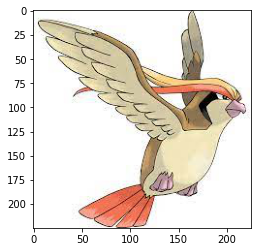

In [ ]:
imshow(bird_images_wo_resize[0])

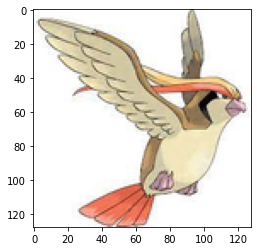

In [ ]:
imshow(bird_images[0])

True
True


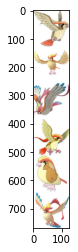

In [ ]:
#einops-> batch 개수 height 높이 width 넓이 color RGB 기본적으로 이 4개의 항목에 대해서 다룸  #아이놉스에 대한 설명 및 데이터 사용
bird_images_nd=np.asarray(bird_images)  #누르면 6 128 128 3으로 되어있는데, 6개 이미지 128128화소 RGB로 구성된 4차원 행렬식인데   #리스트 형태로 받은 이미지를 nd array로 바꿈

#행으로 이미지를 나열하는 방법 3가지
imshow(bird_images_nd.reshape(-1,128,3)) #이 부분 잘 이해안된다 
print(np.array_equal(rearrange(bird_images, 'b h w c -> (b h) w c'),bird_images_nd.reshape(-1,128,3))) #b랑 h를 묶어줌 개수랑 높이를 묶어서 아래로 나열.?..
x=bird_images[0] #1번 피존투를 할당
for z in range(1,len(bird_images)): #1번피존투부터 6번피존투까지 
  x=np.concatenate([x,bird_images[z]],axis=0) #axis = o 하면 행기준으로 쭈욱 #-1은 64*6 대신
print(np.array_equal(rearrange(bird_images, 'b h w c -> (b h) w c'),x))

True

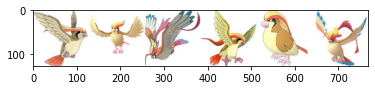

In [ ]:
imshow(rearrange(bird_images, 'b h w c -> h (b w) c'))
x=bird_images[0]
for z in range(1,len(bird_images)):
  x=np.concatenate([x,bird_images[z]],axis=1) #열 기준으로
imshow(x)
np.array_equal(x,rearrange(bird_images, 'b h w c -> h (b w) c'))
#imshow(bird_images_nd.reshape(128,-1,3)[:22]) #.reshape(-1,128,3)) #column에 -1 줄단위로 길게 늘어지므로 화질 낮아진 이미지 반복

In [ ]:
#imshow(rearrange(icebear, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)) #처음에 b1, b2로 나눠주면 6을 둘의 합ㅇ으로 나눠받음 b1 =2이면 b2 = 3 h에 3 열로 2
#imshow(rearrange(icebear, 'b (h h2) w c -> (b h) (w h2) c', h2=2))  #h2 = 2니까 두배로 나눠받음 h는 64가 된다 높이는 두배로 줄고 넓이는 2배로 는다
#imshow(rearrange(icebear, 'b h (w w2) c -> (h w2) (b w) c', w2=2))  #w2 = 2니까 두배로 가로로 길어진다. 가로는 2배 높이는 1/2배

NameError: ignored

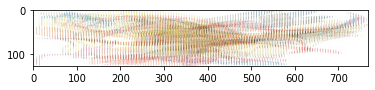

In [ ]:
imshow(rearrange(bird_images, 'b h w c -> h (w b) c')) #axes 순서 중요, 길게 늘여서 그림들이 합쳐짐
imshow()

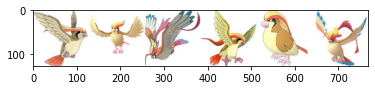

In [ ]:
imshow(rearrange(bird_images, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2))
#imshow(rearrange(bird_images, '(b1 b2) h w c -> h (b1 b2 w) c ', b1=2)) #차이점 (123456, 142536)

(3, 128, 128)


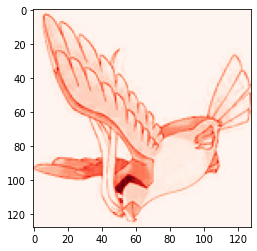

In [ ]:
print(bird_images[0].T.shape) #3차원 행렬 전치시 어떤 축을 기준으로 할지 정해야함 aki aik 이렇게 바꿔야하는데 하나는 고정, 축 필요
imshow(bird_images[0].T[0],cmap='Reds_r') #RGB 중 R층에 해당하는 값임을 보여주기 위해 cmap Reds_r로 설정
#imshow(bird_images[0].T[1],cmap='Greens_r')
#imshow(bird_images[0].T[2],cmap='Blues_r')

True

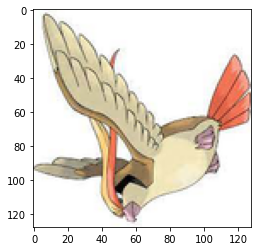

In [ ]:
bird_images_nd=np.asarray(bird_images)
imshow(rearrange(bird_images_nd[0], 'h w c -> w h c'))  #1번째 이미지니까 b값 없음 대신 나머지
#imshow(bird_images_nd[0].transpose(1,0,2)) #rgb 형태 유지 h w c 가  0 1 2 인데 이걸 1 0 2로 순서 바꿈 
np.array_equal(rearrange(bird_images_nd[0], 'h w c -> w h c'),bird_images_nd[0].transpose(1,0,2))

In [ ]:
rearrange(bird_images_nd, 'b h w c -> b 1 h w 1 c').shape  #중간 중간 차원을 추가함

(6, 1, 128, 128, 1, 3)

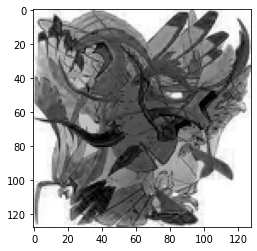

In [ ]:
#평균값으로 차원을 감소
a=reduce(bird_images_nd, 'b h w c -> h w', 'min') #b 와 c를 없애주는데 min을 기준으로
b=reduce(bird_images_nd.astype(float), 'b h w c -> h w c', 'mean') #b를 없애는데 평균으로 그러니까 6개가 합쳐져버림 but 평균시 내부의 값이 모두 실수여야함 그래서 astype float
#imshow(np.around(b).astype('int')) #표현할 때 정수형 데이터이어야한다. 그래서 int 써줌
imshow(a,cmap='gray')

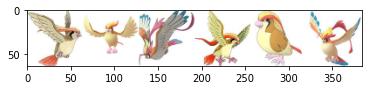

In [ ]:
c=reduce(bird_images_nd.astype(float), 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)
imshow(np.around(c).astype('int'))
d=reduce(bird_images_nd, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2) #result is not as smooth as for mean-pooling
#imshow(d)

In [ ]:
e = reduce(bird_images_nd, 'b h w c -> b () () c', 'max')#-bird_images_nd #각 이미지별 rgb 최고값을 보임, 빼면 색 반전 #broadcasting?
e
#imshow(e[2])

array([[[[ 0,  0,  0]]],


       [[[ 4, 12,  1]]],


       [[[24, 19,  8]]],


       [[[ 0,  0,  0]]],


       [[[ 2,  0,  0]]],


       [[[ 0,  0,  0]]]], dtype=uint8)

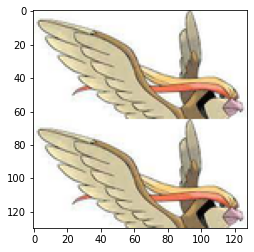

In [ ]:
imshow(repeat(bird_images[0][:65], 'h w c -> (2 h) w c')) #기존 axis를 따라 반복
#imshow(repeat(bird_images[0][25], 'w c -> w new_axis c',new_axis=128)) #새로운 axis에 대해 반복

In [ ]:
#repeat, reduce의 관계
repeated = repeat(bird_images_nd, 'b h w c -> b h new_axis w c', new_axis=2)
reduced = reduce(repeated, 'b h new_axis w c -> b h w c', 'max') #같은 값이 반복되기 때문에 max/min 둘다 넣어도 True 나옴
np.array_equal(bird_images_nd, reduced)

True

In [ ]:
#einops 관련 추가 사항: https://github.com/arogozhnikov/einops/blob/master/docs/1-einops-basics.ipynb

##Matplotlib / EDA

In [ ]:
#Exploratory Data Analysis(탐색적 데이터 분석)
#데이터를 분석하기에 앞서 그래프나 통계적 방법을 통해 자료를 다양한 각도에서 관찰하고 이해하는 과정

In [ ]:
#pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
fontprop = fm.FontProperties(fname='/content/0924/NanumSquareB.ttf', size=18, style='italic')  #폰트설정
train=pd.read_csv('/content/0924/titanic_train.csv') #데이터 읽어오기
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Survived: 1이 생존, Pclass: n등석(1,2,3)
#SibSp: 동승한 배우자/형재자매의 수, parch: 동승한 부모/자식 수
#Cabin: 방호수, Embarked: 탑승지
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


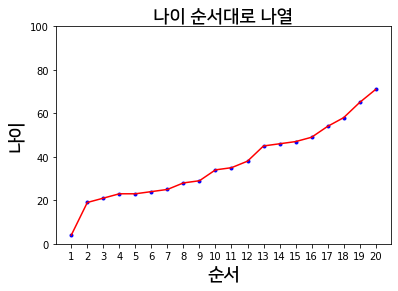

In [ ]:
train_forsimple=train.loc[train['Age']>=1].dropna()[:20] #cabin에 결측치 있는 경우 까지 없애서 급격히 적어짐
train_forsimple.sort_values('Age',inplace=True)
train_forsimple.reset_index(drop=True,inplace=True)
train_forsimple.head(20)
plt.plot(range(20),train_forsimple['Age'],'.b') #양식에 해당 .b는 파랑색 점
train_forsimple['Age'].plot(color='r')
plt.xlabel("순서",fontproperties=fontprop) #x,y축 이름할당
plt.ylabel("나이",fontproperties=fontprop)
plt.title("나이 순서대로 나열",fontproperties=fontprop) #제목
plt.xticks(range(20),range(1,21)) 0부터 19로 하지 않으니 1부터 20으로 바꿈
plt.ylim(0,100) #최저와 최고맞춤
plt.show()

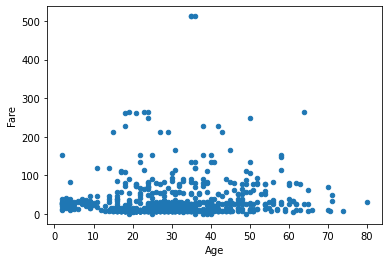

In [ ]:
traintwo=train.loc[train['Age']>1].drop('Cabin',axis=1)
traintwo.plot(kind='scatter',x='Age',y='Fare') #종류 설정 가능 scatter로

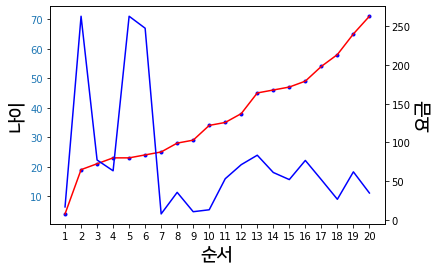

In [ ]:
#하나의 플롯에 여러개를 그림

fig,ax1=plt.subplots() #subplot사용
ax1.plot(range(20),train_forsimple['Age'],'.b') 
ax1.plot(train_forsimple['Age'],color='r')
ax1.set_xlabel("순서",fontproperties=fontprop)
ax1.set_ylabel("나이",fontproperties=fontprop)
ax1.tick_params(axis='y',labelcolor='C0')  #tick이 축에 적히는 숫자를 얘기
ax2=ax1.twinx() #이부분통해 2가지 그래프 가능해짐
ax2.set_ylabel("요금",fontproperties=fontprop)
ax2.plot(train_forsimple['Fare'],color='b')
plt.xticks(range(20),range(1,21))
plt.show()

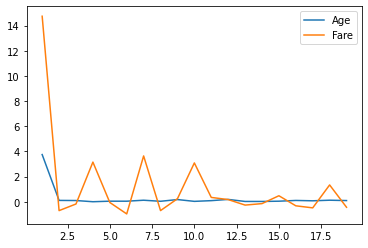

In [ ]:
train_forsimple[['Age','Fare']].pct_change().plot() #변동률, 적합한 데이터는 아닌듯..

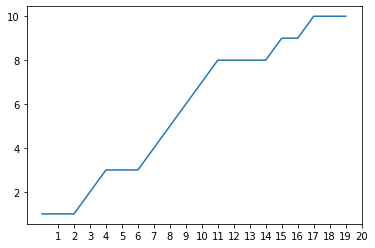

In [ ]:
train_forsimple['Survived'].cumsum().plot(xticks=range(1,21)) #누적합계(역시..적합한가요..)

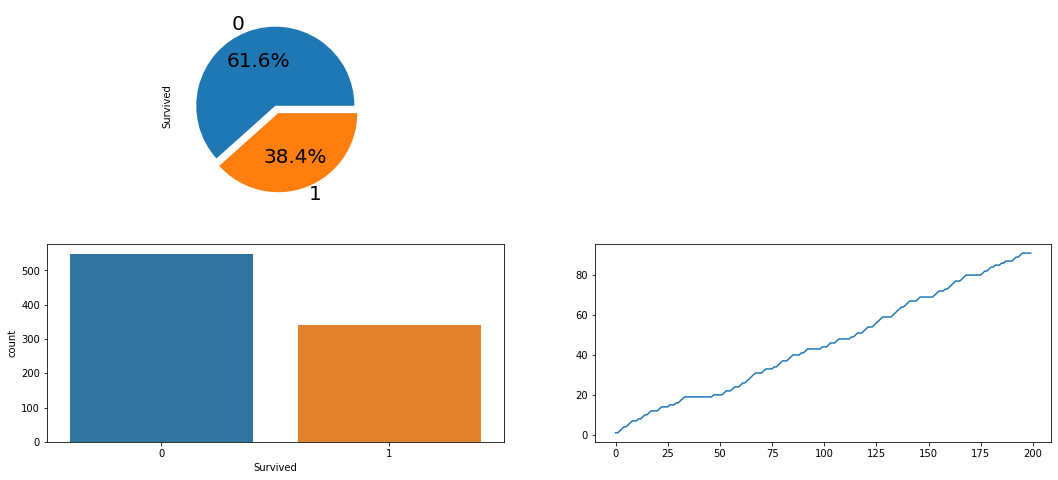

In [ ]:
fig,ax=plt.subplots(2,2,figsize=((18,8)))
train['Survived'].value_counts().plot.pie(explode=(0,0.1), #0.9,0.9  #valuecount하면 각 value의 숫자인데 #plot pie형태로  explode는 둘 사이의 간격
                                          autopct='%1.1f%%',ax=ax[0,0],textprops={'fontsize':20}) 
#plt.show(fig)
train_agesurv=train.loc[train['Age']>1]
train_agesurv=train_agesurv[['Age','Survived']].dropna() 
train_agesurv.sort_values('Age',inplace=True)
train_agesurv.reset_index(drop=True,inplace=True)
train_agesurv['Survived'].cumsum().plot(ax=ax[1,1])
sns.countplot(x=train['Survived'],ax=ax[1,0])
ax[0,1].axis('off')
plt.show()

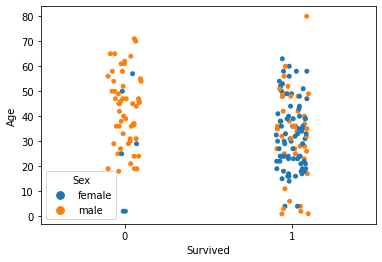

In [ ]:
sns.stripplot(data=traintwo,x="Survived",y='Age',hue='Sex') #생존자 성비

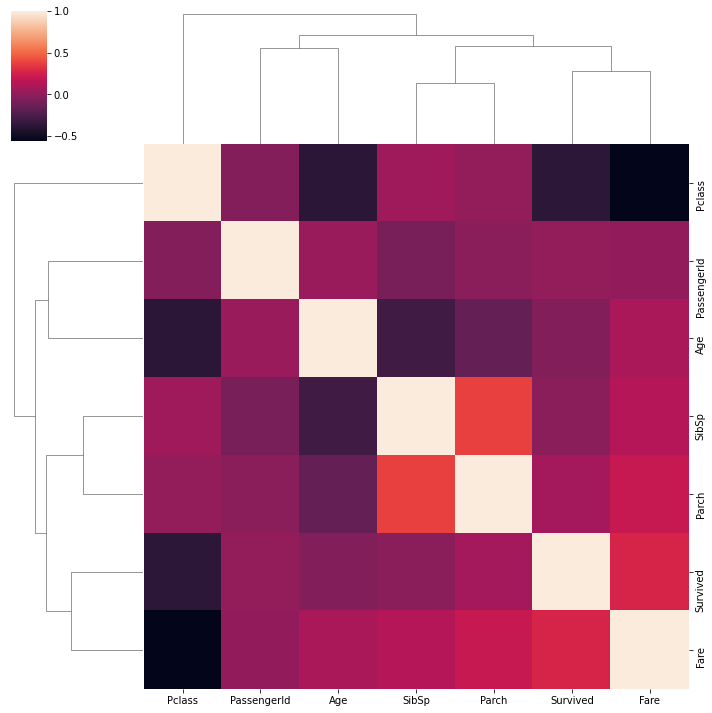

In [ ]:
corr=traintwo.corr() #괄호안 변수에 따라 다양한 상관관계 형태 o
#Small	0.1 ~ 0.3	-0.1 ~ -0.3
#Medium	0.3 ~ 0.5	-0.3 ~ -0.5
#Large	0.5 ~ 1.0	-0.5 ~ -1.0 라고 합니다..
sns.clustermap(corr) #PassengerID 등 연관성을 따질수 없는 데이터들이 있긴 함
plt.savefig('cluster.png')  #이렇게 하면 다운로드된다.

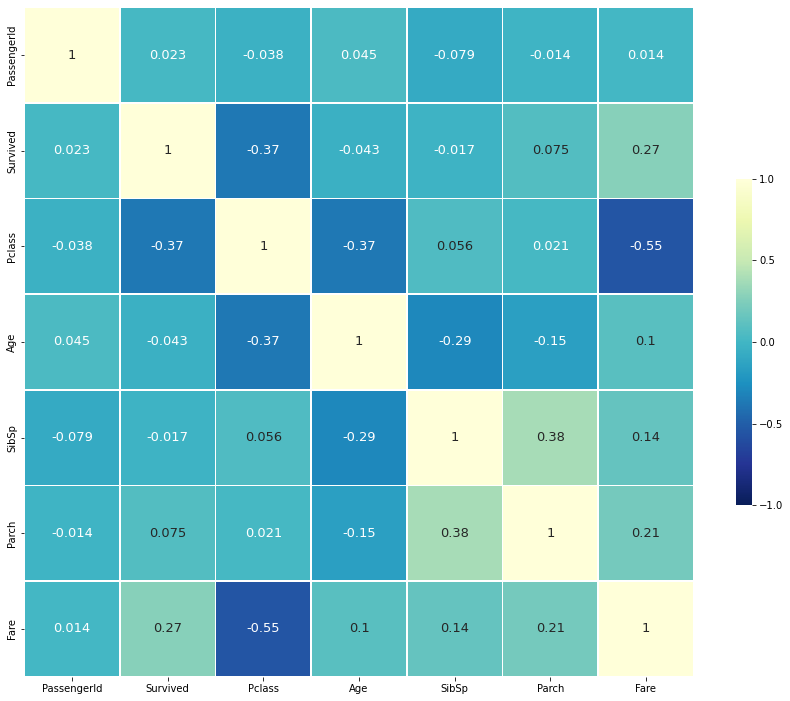

In [ ]:
f, ax = plt.subplots(figsize=(15, 15)) #크기 지정
heatmap = sns.heatmap(corr,
                      square = True,
                      linewidths = .5,
                      cmap = 'YlGnBu_r',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -0.5, 0 , 0.5 , 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 13}
                     )
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})